<a href="https://colab.research.google.com/github/shortcipher3/stackoverflow/blob/master/stars.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#https://stackoverflow.com/questions/63079576/reduce-image-of-stars-into-star-coordinates-with-radius-numpy-opencv
!wget https://scx1.b-cdn.net/csz/news/800/2018/studyofdista.jpg

--2020-07-25 21:53:22--  https://scx1.b-cdn.net/csz/news/800/2018/studyofdista.jpg
Resolving scx1.b-cdn.net (scx1.b-cdn.net)... 45.35.205.78
Connecting to scx1.b-cdn.net (scx1.b-cdn.net)|45.35.205.78|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [image/jpeg]
Saving to: ‘studyofdista.jpg’

studyofdista.jpg        [ <=>                ]  46.90K  --.-KB/s    in 0.02s   

2020-07-25 21:53:22 (1.93 MB/s) - ‘studyofdista.jpg’ saved [48022]



In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
img = cv2.imread('studyofdista.jpg', cv2.IMREAD_GRAYSCALE)

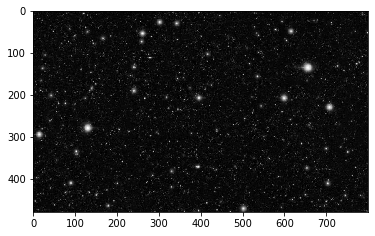

In [ ]:
plt.imshow(img, interpolation='nearest', cmap='gray')

In [ ]:
ret, mask = cv2.threshold(img, 100, 255, cv2.CV_8U)
contours, hierarchy = cv2.findContours(mask, 1, 2)
stars = []
for cnt in contours:
  area = cv2.contourArea(cnt)
  if area < 2:
    continue
  x, y, w, h = cv2.boundingRect(cnt)
  # 1. X-coordinate
  x_coord = x + w/2.0
  # 2. Y-coordinate
  y_coord = y + h/2.0
  # 3. brightness
  star_mask = np.zeros(img.shape,np.uint8)
  cv2.drawContours(star_mask, [cnt], 0, 255, -1)
  mean_val = cv2.mean(img, mask=star_mask)[0]
  min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(img, mask=star_mask)
  # 4. radius
  radius = np.sqrt(area/(2*np.pi))
  stars.append({'x': x_coord,
                'y': y_coord,
                'mean_brightness': mean_val,
                'max_brightness': max_val,
                'radius': radius})


In [ ]:
stars

[{'max_brightness': 221.0,
  'mean_brightness': 148.33333333333331,
  'radius': 0.5641895835477563,
  'x': 471.5,
  'y': 479.0},
 {'max_brightness': 211.0,
  'mean_brightness': 152.75,
  'radius': 0.7463526651802308,
  'x': 395.5,
  'y': 476.5},
 {'max_brightness': 204.0,
  'mean_brightness': 146.7142857142857,
  'radius': 0.690988298942671,
  'x': 439.5,
  'y': 474.5},
 {'max_brightness': 194.0,
  'mean_brightness': 139.57142857142856,
  'radius': 0.690988298942671,
  'x': 593.5,
  'y': 468.5},
 {'max_brightness': 246.0,
  'mean_brightness': 150.55769230769232,
  'radius': 3.742410318509555,
  'x': 503.0,
  'y': 472.0},
 {'max_brightness': 177.0,
  'mean_brightness': 137.16666666666666,
  'radius': 0.6307831305050401,
  'x': 695.5,
  'y': 465.5},
 {'max_brightness': 247.0,
  'mean_brightness': 151.08695652173913,
  'radius': 1.5706373285785544,
  'x': 179.5,
  'y': 465.0},
 {'max_brightness': 181.0,
  'mean_brightness': 144.5,
  'radius': 0.6307831305050401,
  'x': 51.5,
  'y': 463.5}